<a href="https://colab.research.google.com/github/Priyanka30-94/Walmart-Case-Study/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import the dataset and do usual data analysis steps like checking the structure &
 characteristics of the dataset
 a. Thedata type of all columns in the “customers” table.
 Hint: We want you to display the data type of each column present in the
 dataset.
 b. Youcan find the number of rows and columns given in the dataset
 Hint: You can find the shape of the dataset.
 c. Check for the missing values and find the number of missing values in each


In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the text file
uploaded = files.upload()

# Step 2: Load the dataset (use the actual filename you uploaded)
# Note: You don't need to specify the full path; just use the name after uploading
df = pd.read_csv("walmart_data.txt", delimiter=',')  # Adjust delimiter if different

# Step 3: Display the structure of the DataFrame
print("Columns in the DataFrame:")
print(df.columns)

# Step 4: Display the first few rows of the DataFrame
print("\nFirst few rows of the dataset:")
print(df.head())

# Step 5: Display data types of each column
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)

# Step 6: Get the shape of the dataset
shape = df.shape
print(f'\nNumber of rows: {shape[0]}, Number of columns: {shape[1]}')

# Step 7: Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Additional steps can be added here as needed.


Saving walmart_data.txt to walmart_data (1).txt
Columns in the DataFrame:
Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

First few rows of the dataset:
   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2               0                 3      8370  
1                          2               0                 1     15200  
2                          2               0                12      1422  
3           

Q-2  Detect Null values and outliers
 a. Find the outliers for every continuous variable in the dataset
 Hint: Use boxplots to find the outliers in the given dataset
 b. Remove/clip the data between the 5 percentile and 95 percentile
 Hint: You can use np.clip() for clipping the data

Checking for null values:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Continuous variables in the dataset:
['User_ID', 'Occupation', 'Marital_Status', 'Product_Category', 'Purchase']


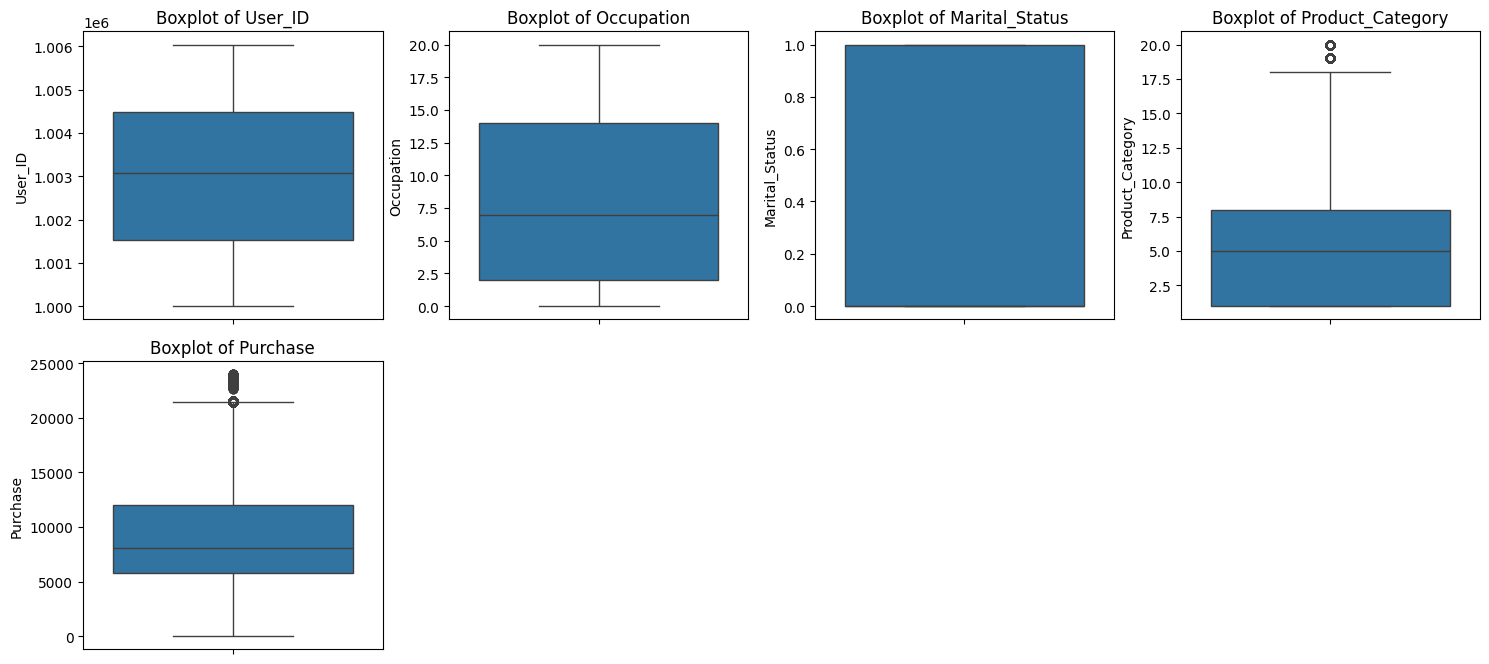

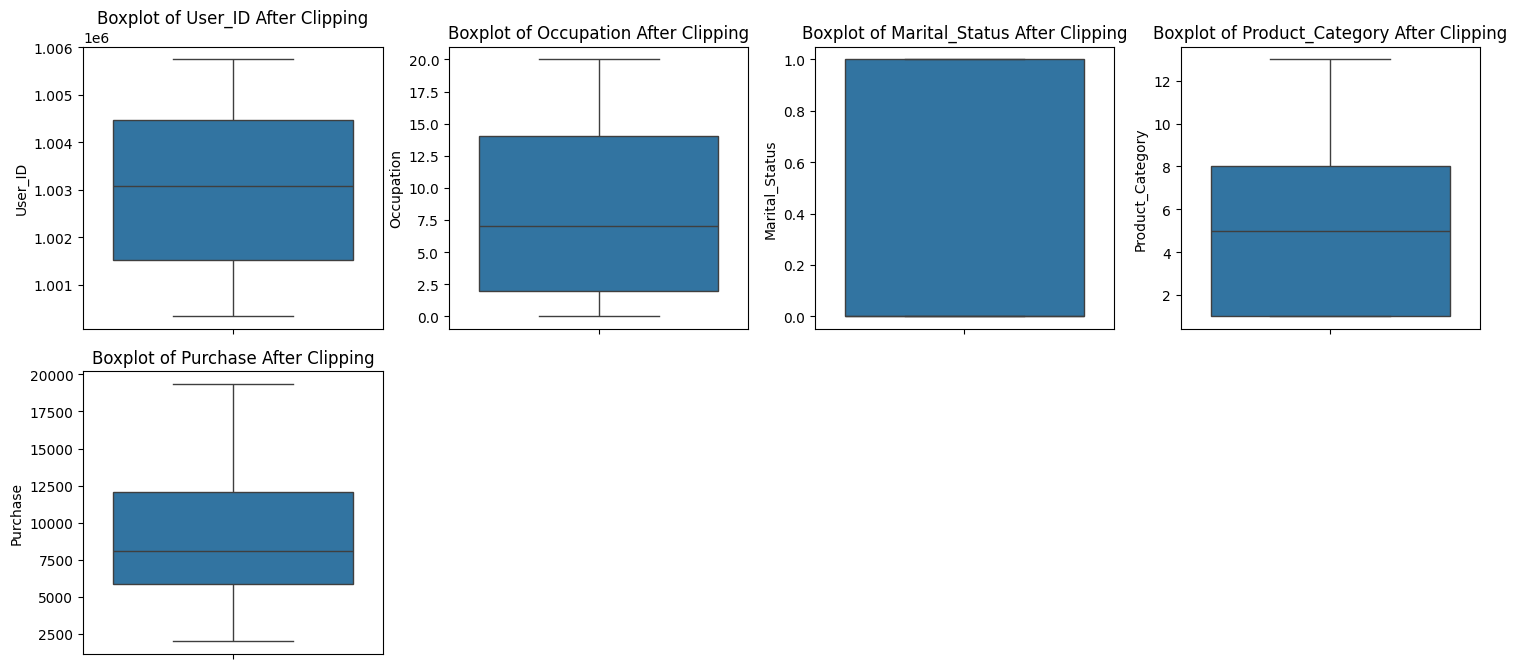


User_ID - Remaining Outliers:
550068

Occupation - Remaining Outliers:
550068

Marital_Status - Remaining Outliers:
550068

Product_Category - Remaining Outliers:
550068

Purchase - Remaining Outliers:
0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already uploaded and loaded the dataset as 'df'
# Step 1: Check for null values
print("Checking for null values:")
print(df.isnull().sum())

# Step 2: Identify continuous variables
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nContinuous variables in the dataset:")
print(continuous_vars)

# Step 3: Find outliers using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(3, 4, i)  # Adjust the layout based on number of continuous variables
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Step 4: Clip the data between the 5th and 95th percentiles
for col in continuous_vars:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.95)
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Step 5: Verify clipping by plotting boxplots again
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} After Clipping')
plt.tight_layout()
plt.show()

# Optional: Check for any remaining outliers
for col in continuous_vars:
    print(f'\n{col} - Remaining Outliers:')
    print(df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0])


Q-3 Data Exploration
 a. Whatproducts are different age groups buying?
 Hint: You can use histplot to find the relationship between products and age
 groups
 b. Is there a relationship between age, marital status, and the amount spent?
 Hint: You can do multivariate analysis to find the relationship between age,
 marital status, and the amount spent
 c. Arethere preferred product categories for different genders?
 Hint: You can apply different hist plots for different genders


<ipython-input-18-2b8a2e4c7232>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Age'] = pd.cut(df['Age'].replace({'0-17': 0, '18-25': 18, '26-35': 26,


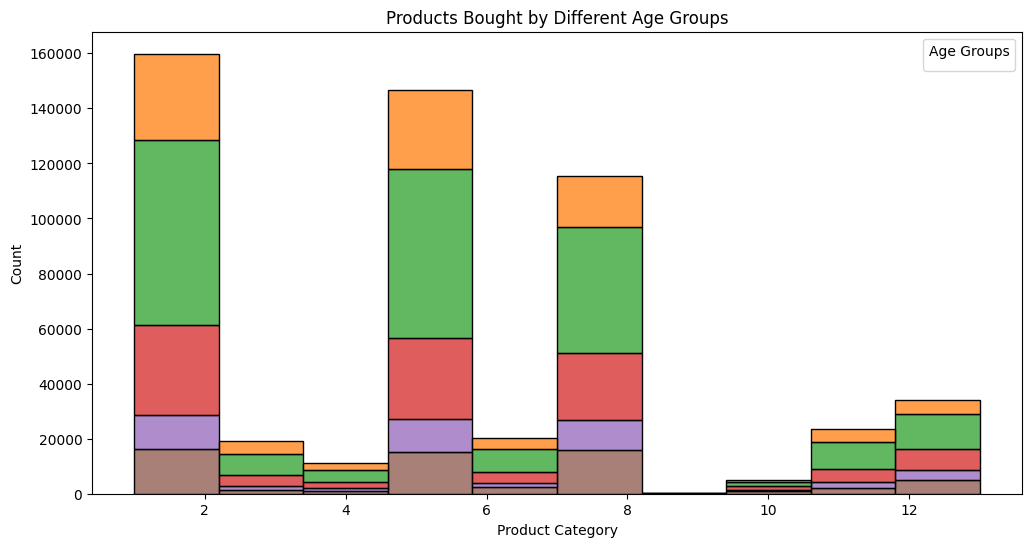

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


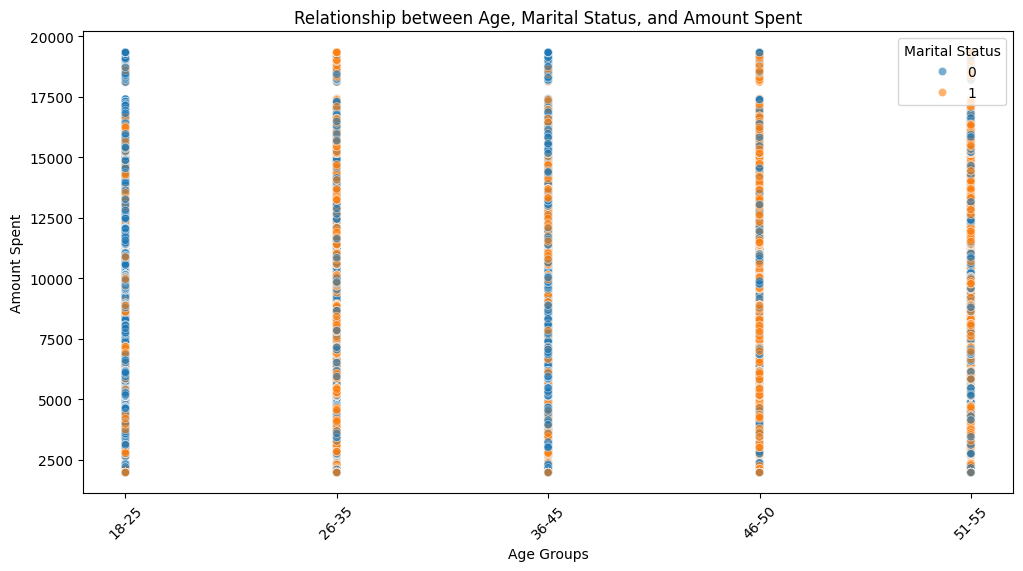

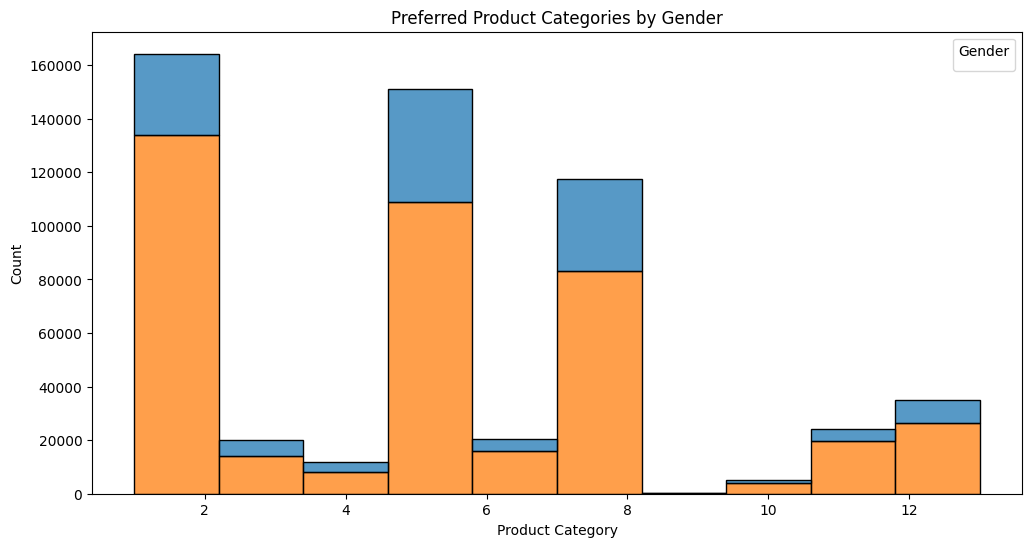

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your dataset as 'df'

# Step 1: Prepare Age Groups
# Define the bins and labels based on numerical age ranges
age_bins = [0, 17, 25, 35, 45, 50, 55, 100]  # Adjusted numeric boundaries
age_labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# Convert age categories into numeric bins
df['Age'] = pd.cut(df['Age'].replace({'0-17': 0, '18-25': 18, '26-35': 26,
                                       '36-45': 36, '46-50': 46, '51-55': 51,
                                       '55+': 55}), bins=age_bins, labels=age_labels, right=True)

# a. What products are different age groups buying?
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Product_Category', hue='Age', multiple='stack', bins=10)
plt.title('Products Bought by Different Age Groups')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Age Groups')
plt.show()

# b. Relationship between age, marital status, and amount spent
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='Purchase', hue='Marital_Status', alpha=0.6)
plt.title('Relationship between Age, Marital Status, and Amount Spent')
plt.xlabel('Age Groups')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

# c. Preferred product categories for different genders
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Product_Category', hue='Gender', multiple='stack', bins=10)
plt.title('Preferred Product Categories by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


 Q- 4 How does gender affect the amount spent?
 Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
 intervals for the average amount spent per gender. First, compute the confidence
 interval for whatever data is available, and then repeat the same with smaller sample
 sizes- 300, 3000, and 30000.
 a. Fromthe above calculated CLT answer the following questions.
 i.
 Is the confidence interval computed using the entire dataset wider for
 one of the genders? Why is this the case?
 ii.
 iii.
 iv.
# How is the width of the confidence interval affected by the sample size?
 Dothe confidence intervals for different sample sizes overlap?
 Howdoesthe sample size affect the shape of the distributions of the
 means?

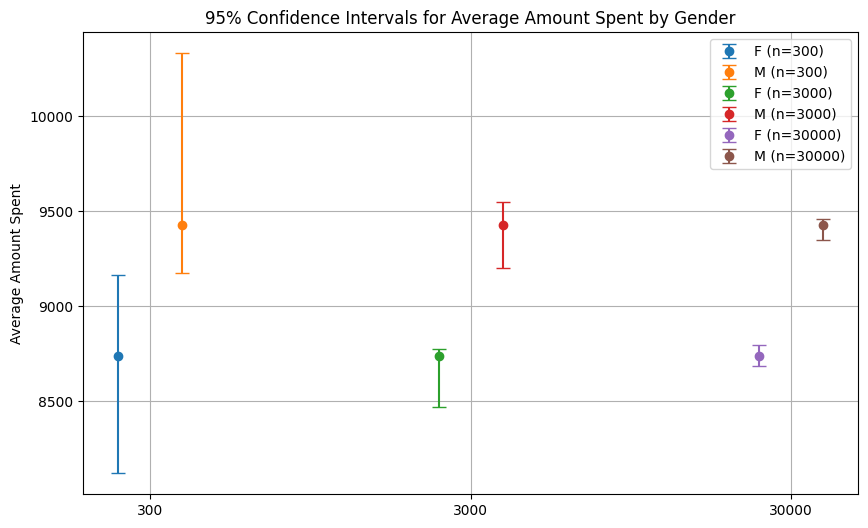

In [ ]:
# Visualization of confidence intervals
plt.figure(figsize=(10, 6))
x_positions = np.arange(len(sample_sizes))  # Create positions for each sample size

for i, size in enumerate(sample_sizes):
    for gender in ['F', 'M']:
        mean_purchase = np.mean(df[df['Gender'] == gender]['Purchase'])
        ci = sample_ci_results[size][gender]  # Get the confidence interval
        yerr = [[mean_purchase - ci[0]], [ci[1] - mean_purchase]]  # Calculate the lower and upper errors

        plt.errorbar(x=i + (0.1 if gender == 'M' else -0.1),
                     y=mean_purchase,
                     yerr=yerr,
                     label=f"{gender} (n={size})",
                     fmt='o',
                     capsize=5)

plt.xticks(ticks=x_positions, labels=[str(size) for size in sample_sizes])
plt.title('95% Confidence Intervals for Average Amount Spent by Gender')
plt.ylabel('Average Amount Spent')
plt.legend()
plt.grid()
plt.show()


Q- 5 How does Marital_Status affect the amount spent?
 Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
 intervals for the average amount spent per Marital_Status. First, compute the
 confidence interval for whatever data is available, and then repeat the same with
 smaller sample sizes- 300, 3000, and 30000.
 a. Fromthe above calculated CLT answer the following questions.
 i.
 Is the confidence interval computed using the entire dataset wider for
 one of the genders? Why is this the case?
 ii.
 iii.
 iv.
 Howis the width of the confidence interval affected by the sample size?
 Dothe confidence intervals for different sample sizes overlap?
 Howdoesthe sample size affect the shape of the distributions of the
 means?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame `df` already loaded

# Function to calculate bootstrap confidence intervals
def bootstrap_ci(data, num_samples=1000, ci=0.95):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower_bound = np.percentile(means, (1 - ci) / 2 * 100)
    upper_bound = np.percentile(means, (1 + ci) / 2 * 100)
    return lower_bound, upper_bound

# Sample sizes to consider
sample_sizes = [300, 3000, 30000]

# Store results
ci_results = {}

# Calculate CI for the entire dataset
for status in df['Marital_Status'].unique():
    ci_results[status] = {}
    data = df[df['Marital_Status'] == status]['Purchase']

    # Full dataset CI
    ci_results[status]['full'] = bootstrap_ci(data)

    # CIs for specified sample sizes
    for size in sample_sizes:
        sample_data = np.random.choice(data, size=size, replace=True)
        ci_results[status][size] = bootstrap_ci(sample_data)

# Display results
for status in ci_results:
    print(f"95% Confidence Intervals for Marital Status {status}:")
    print(f"Full dataset: {ci_results[status]['full']}")
    for size in sample_sizes:
        print(f"Sample Size {size}: {ci_results[status][size]}")
    print("\n")


95% Confidence Intervals for Marital Status 0:
Full dataset: (9242.017237729075, 9275.11970731159)
Sample Size 300: (8927.28275, 10057.818166666668)
Sample Size 3000: (9010.556341666666, 9342.268516666667)
Sample Size 30000: (9184.44537, 9294.514915833333)


95% Confidence Intervals for Marital Status 1:
Full dataset: (9234.774456258849, 9274.584684938558)
Sample Size 300: (8782.423499999999, 9888.54625)
Sample Size 3000: (9195.681083333333, 9560.6674)
Sample Size 30000: (9218.103394166666, 9329.60619)




Q-6 . HowdoesAgeaffect the amount spent?
Hint: Use the central limit theorem and bootstrapping to compute the 95% confidence
 intervals for the average amount spent per Marital_Status. First, compute the
 confidence interval for whatever data is available, and then repeat the same with
 smaller sample sizes- 300, 3000, and 30000.
 a. Fromthe above calculated CLT answer the following questions.
 i.
 Is the confidence interval computed using the entire dataset wider for
 one of the genders? Why is this the case?
 ii.
 iii.
 iv.
 Howis the width of the confidence interval affected by the sample size?
 Dothe confidence intervals for different sample sizes overlap?
 Howdoesthe sample size affect the shape of the distributions of the
 means?

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Age Group: nan
  Sample Size full: (nan, nan)
  Sample Size 300: (nan, nan)
  Sample Size 3000: (nan, nan)
  Sample Size 30000: (nan, nan)
Age Group: 51-55
  Sample Size full: (9406.575474543788, 9487.261774852095)
  Sample Size 300: (8851.147416666667, 9862.124916666668)
  Sample Size 3000: (9312.526174999999, 9646.713316666666)
  Sample Size 30000: (9388.149873333334, 9504.579647499999)
Age Group: 26-35
  Sample Size full: (9221.86865376821, 9262.771154599315)
  Sample Size 300: (9397.322, 10479.49475)
  Sample Size 3000: (9211.774783333334, 9562.598116666666)
  Sample Size 30000: (9255.255280833333, 9360.130694166666)
Age Group: 46-50
  Sample Size full: (9157.569167523687, 9244.240085556115)
  Sample Size 300: (8501.6965, 9642.966416666666)
  Sample Size 3000: (9088.990775, 9427.176166666666)
  Sample Size 30000: (9114.23826, 9224.831745)
Age Group: 36-45
  Sample Size full: (9294.951120322145, 9352.90471648805)
  Sample Size 300: (8720.612500000001, 9772.6045)
  Sample Size 3000: 

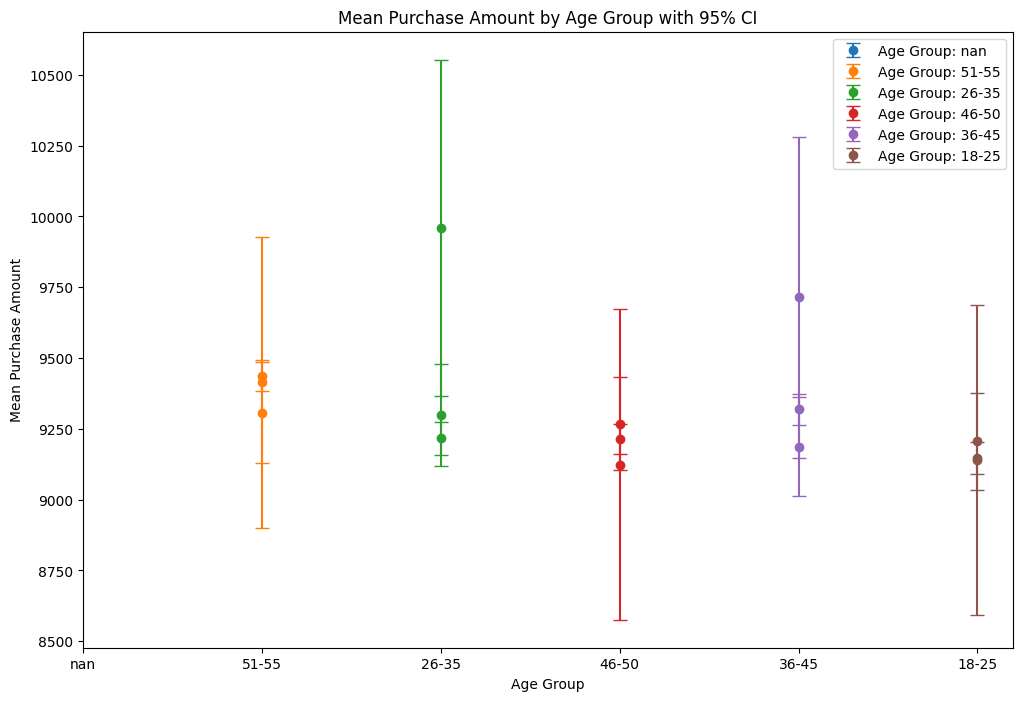

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already defined and contains your dataset
# Let's define a function for bootstrapping
def bootstrap_ci(data, n_iterations=1000, alpha=0.05):
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, 100 * (alpha / 2))
    upper = np.percentile(means, 100 * (1 - alpha / 2))
    return lower, upper

# Step 1: Initialize a dictionary to store confidence intervals by age group
age_ci_results = {}

# Step 2: Calculate confidence intervals for the entire dataset
for age_group in df['Age'].unique():
    purchases = df[df['Age'] == age_group]['Purchase']
    ci_full = bootstrap_ci(purchases)
    age_ci_results[age_group] = {'full': ci_full}

# Step 3: Calculate confidence intervals for specified sample sizes
sample_sizes = [300, 3000, 30000]
for size in sample_sizes:
    for age_group in df['Age'].unique():
        purchases = df[df['Age'] == age_group]['Purchase']
        sample_purchases = np.random.choice(purchases, size=min(size, len(purchases)), replace=False)
        ci_sample = bootstrap_ci(sample_purchases)
        age_ci_results[age_group][size] = ci_sample

# Step 4: Output the confidence intervals
for age_group, ci_dict in age_ci_results.items():
    print(f"Age Group: {age_group}")
    for key, ci in ci_dict.items():
        print(f"  Sample Size {key}: {ci}")

# Optional: Visualization of the results
plt.figure(figsize=(12, 8))
for i, age_group in enumerate(df['Age'].unique()):
    means = []
    ci_widths = []
    for size in sample_sizes:
        purchases = df[df['Age'] == age_group]['Purchase']
        sample_purchases = np.random.choice(purchases, size=min(size, len(purchases)), replace=False)
        mean_purchase = np.mean(sample_purchases)
        means.append(mean_purchase)
        ci = bootstrap_ci(sample_purchases)
        ci_widths.append((ci[1] - ci[0]) / 2)  # Half-width of CI for error bars

    plt.errorbar(x=[i] * len(sample_sizes), y=means, yerr=ci_widths,
                 label=f'Age Group: {age_group}', fmt='o', capsize=5)

plt.xticks(ticks=range(len(df['Age'].unique())), labels=df['Age'].unique())
plt.title('Mean Purchase Amount by Age Group with 95% CI')
plt.ylabel('Mean Purchase Amount')
plt.xlabel('Age Group')
plt.legend()
plt.show()


15102
Age Group: 51-55
  Sample Size full: (9407.78096075327, 9487.062517706858)
  Sample Size 300: (8668.535249999999, 9807.250083333332)
  Sample Size 3000: (9331.012733333333, 9657.085783333332)
  Sample Size 30000: (9384.980503333332, 9497.681190000001)
Age Group: 26-35
  Sample Size full: (9223.612366966168, 9264.84381680154)
  Sample Size 300: (8544.790333333334, 9552.394333333334)
  Sample Size 3000: (9140.893316666667, 9484.622741666668)
  Sample Size 30000: (9194.199159999998, 9305.250587499999)
Age Group: 46-50
  Sample Size full: (9162.731723047635, 9246.53594560294)
  Sample Size 300: (8994.877999999999, 10017.449083333333)
  Sample Size 3000: (9053.228758333333, 9412.460208333332)
  Sample Size 30000: (9153.809847499999, 9258.946194166665)
Age Group: 36-45
  Sample Size full: (9295.302096797652, 9351.512129475608)
  Sample Size 300: (8576.493166666667, 9666.802249999999)
  Sample Size 3000: (9079.586266666665, 9397.622741666668)
  Sample Size 30000: (9273.712454166665, 938

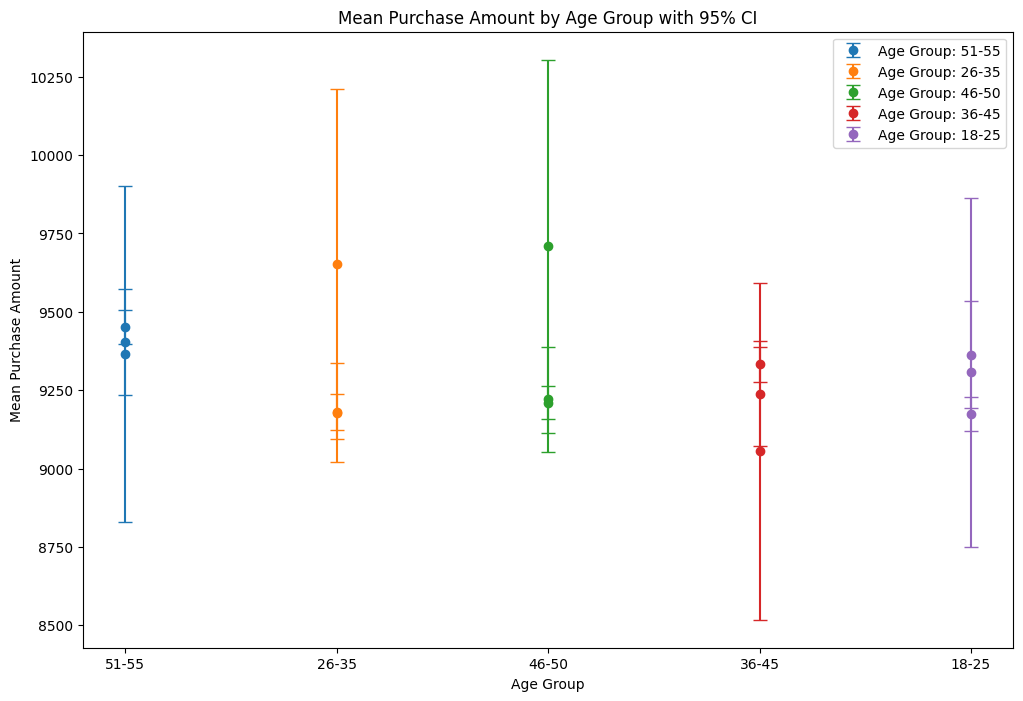

In [ ]:
print(df['Age'].isnull().sum())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter out rows where 'Age' or 'Purchase' is NaN
df = df.dropna(subset=['Age', 'Purchase'])

# Bootstrapping function
def bootstrap_ci(data, n_iterations=1000, alpha=0.05):
    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, 100 * (alpha / 2))
    upper = np.percentile(means, 100 * (1 - alpha / 2))
    return lower, upper

# Initialize a dictionary to store confidence intervals by age group
age_ci_results = {}

# Calculate confidence intervals for the entire dataset
for age_group in df['Age'].unique():
    purchases = df[df['Age'] == age_group]['Purchase']
    ci_full = bootstrap_ci(purchases)
    age_ci_results[age_group] = {'full': ci_full}

# Calculate confidence intervals for specified sample sizes
sample_sizes = [300, 3000, 30000]
for size in sample_sizes:
    for age_group in df['Age'].unique():
        purchases = df[df['Age'] == age_group]['Purchase']
        if len(purchases) > 0:
            sample_purchases = np.random.choice(purchases, size=min(size, len(purchases)), replace=False)
            ci_sample = bootstrap_ci(sample_purchases)
            age_ci_results[age_group][size] = ci_sample

# Output the confidence intervals
for age_group, ci_dict in age_ci_results.items():
    print(f"Age Group: {age_group}")
    for key, ci in ci_dict.items():
        print(f"  Sample Size {key}: {ci}")

# Optional: Visualization of the results
plt.figure(figsize=(12, 8))
for i, age_group in enumerate(df['Age'].unique()):
    means = []
    ci_widths = []
    for size in sample_sizes:
        purchases = df[df['Age'] == age_group]['Purchase']
        if len(purchases) > 0:
            sample_purchases = np.random.choice(purchases, size=min(size, len(purchases)), replace=False)
            mean_purchase = np.mean(sample_purchases)
            means.append(mean_purchase)
            ci = bootstrap_ci(sample_purchases)
            ci_widths.append((ci[1] - ci[0]) / 2)  # Half-width of CI for error bars

    plt.errorbar(x=[i] * len(sample_sizes), y=means, yerr=ci_widths,
                 label=f'Age Group: {age_group}', fmt='o', capsize=5)

plt.xticks(ticks=range(len(df['Age'].unique())), labels=df['Age'].unique())
plt.title('Mean Purchase Amount by Age Group with 95% CI')
plt.ylabel('Mean Purchase Amount')
plt.xlabel('Age Group')
plt.legend()
plt.show()
